## Pacotes e Bibliotecas

In [ ]:
install.packages("e1071") 
install.packages("party")

library(party)
library(e1071)
library(dplyr) # Analises estatisticas
library(ggplot2) # Exploração Gráfica
library(glue) # print especial

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse




## Dados de Cogumelos

In [ ]:
cogumelos = read.csv("https://www.openml.org/data/get_csv/24/dataset_24_mushroom.arff") 

In [ ]:
head(cogumelos,3)

,cap.shape,cap.surface,cap.color,bruises.3F,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,⋯,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,spore.print.color,population,habitat,class
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,'x','s','n','t','p','f','c','n','k','e',⋯,'w','w','p','w','o','p','k','s','u','p'
2,'x','s','y','t','a','f','c','b','k','e',⋯,'w','w','p','w','o','p','n','n','g','e'
3,'b','s','w','t','l','f','c','b','n','e',⋯,'w','w','p','w','o','p','n','n','m','e'


In [ ]:
sum(is.na(cogumelos))

[1] 0

In [ ]:
# Removendo as aspas das strings com a substituição com gsub() (Opcional - estético)
for(i in 1:ncol(cogumelos)){cogumelos[,i] <- gsub("'",'', cogumelos[,i])}

# Forma 2: Pelo fatiamento da string com substr()
#for(i in 1:ncol(cogumelos)){cogumelos[,i] <- substr(cogumelos[,i],2,2)}

In [ ]:
# Alterando todas as classes para factor - (necessário para a árvore de decisão)
for(i in 1:ncol(cogumelos)){cogumelos[,i] <- as.factor(cogumelos[,i])}

In [ ]:
# Elimina valores NA
cogumelos=na.omit(cogumelos)

In [ ]:
head(cogumelos,3)

,cap.shape,cap.surface,cap.color,bruises.3F,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,⋯,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,spore.print.color,population,habitat,class
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,x,s,n,t,p,f,c,n,k,e,⋯,w,w,p,w,o,p,k,s,u,p
2,x,s,y,t,a,f,c,b,k,e,⋯,w,w,p,w,o,p,n,n,g,e
3,b,s,w,t,l,f,c,b,n,e,⋯,w,w,p,w,o,p,n,n,m,e
4,x,y,w,t,p,f,c,n,n,e,⋯,w,w,p,w,o,p,k,s,u,p
5,x,s,g,f,n,f,w,b,k,t,⋯,w,w,p,w,o,e,n,a,g,e
6,x,y,y,t,a,f,c,b,n,e,⋯,w,w,p,w,o,p,k,n,g,e


In [ ]:
str(cogumelos)

'data.frame':	8124 obs. of  23 variables:
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises.3F              : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape             : Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk.root              : Factor w/ 5 levels "?","b","c","e",..: 4 3 3 4 4 3 3 3 4 3 ...

In [ ]:
summary(cogumelos)

 cap.shape cap.surface   cap.color    bruises.3F      odor      gill.attachment
 b: 452    f:2320      n      :2284   f:4748     n      :3528   a: 210         
 c:   4    g:   4      g      :1840   t:3376     f      :2160   f:7914         
 f:3152    s:2556      e      :1500              s      : 576                  
 k: 828    y:3244      y      :1072              y      : 576                  
 s:  32                w      :1040              a      : 400                  
 x:3656                b      : 168              l      : 400                  
                       (Other): 220              (Other): 484                  
 gill.spacing gill.size   gill.color   stalk.shape stalk.root
 c:6812       b:5612    b      :1728   e:3516      ?:2480    
 w:1312       n:2512    p      :1492   t:4608      b:3776    
                        w      :1202               c: 556    
                        n      :1048               e:1120    
                        g      : 752              

## Conjuntos de treino e teste

In [ ]:
# Gera Conjuntos de Treinamento e Teste
RNGversion("3.5.2")
set.seed(1987)

amostra <- sample(1:nrow(cogumelos),round(nrow(cogumelos)/3))
train <- cogumelos[-amostra,]
test <- cogumelos[amostra,]

Warning message in RNGkind("Mersenne-Twister", "Inversion", "Rounding"):
“non-uniform 'Rounding' sampler used”


## Naive Bayes

CONSIDERAÇÕES SOBRE NAIVE BAYES:
i. É um modelo de Aprendizado Supervisionado baseado no Teorema de Bayes.

ii. É um modelo Generativo, no que difere por exemplo de uma Árvore de Decisão.

iii. Assume que todas as variáveis são independentes, uma hipótese que dificilmente se verifica em casos reais, mas que permite uma grande simplificação da cadeia de probabilidades que passa a ter um único nível.

iv. O classificador naive bayes assume que o 
efeito do valor de um preditor é independente dos valores de 
outros preditores. Essa suposição é chamada de independência 
condicional de classe. 

v. As variáveis numéricas precisam ser transformadas em variáveis 
categóricas (binning) antes de empregar as tabelas de freqüência. 
Outra opção é empregar a distribuição da variável numérica para 
ter um bom valor da frequência, por exemplo, assumindo uma 
distribuição normal

vi. Quaisquer variáveis podem ser empregadas como preditoras e classe. Sendo assim é preciso ter o cuidado de entender quais variáveis têm características de causa e quais têm característica de efeito

vii. A função naiveBayes inclui o parâmetro laplace
(laplace=1), um inteiro positivo que será adicionado para cada 
classe, evitando o problema de frequência zero.

ix. É possível obter melhores resultados discretizando as 
variáveis numéricas com os comandos cut( ) ou hist( ) para 
discretizar 

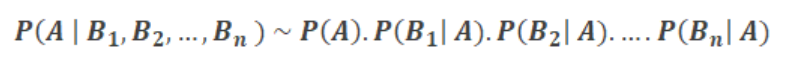

In [ ]:
fitBayes = naiveBayes(class~.,data=train,laplace=1)

# predict Output 
predBayes = predict(fitBayes, test)
predBayes

[1] e p p e e e e e p e p p p e e e e p p e e e p p p e e e p p p e e e e e e
  [38] p e p e e e e p e e e p e p e e e e e e e e e p e e p e e e p e p e e p e
  [75] e e e e e p e e p p e p e e e p p p e e e p p p p p p e e e e e e e p e e
 [112] e e e p e e e p p e p e e p e e e e p e p e e e e e e e e e e e e p e e e
 [149] e p p e e p e e e e e e e e p e e e e e p p e p e p e e e p e e e e e e p
 [186] e p e p e p p e e e p e p e e p e e e e e e e e p p p p p e p e p e e p e
 [223] e e e p p e p p e p e e p p p e p p p p e e e p e p p p p p e p p e e p p
 [260] e p e e e p e e p e e p e e e e p p e e e p e e p p e p p p p e e e p p e
 [297] e p p e p e p p e p p p p e p e p e e e e e e e p e p p e p p e e p p e e
 [334] e e p p p e e p p e p p p e e p e p e p p p e p p e p p e p e e e p e e e
 [371] e e e e p e e e e e e e p e p p p p e p e p e p e p e e e e e p e e e e e
 [408] p p p p p e e p e e e p e p e e p p p e e e p e e p e p e e p e e p p e p
 [445] p p p e p e e e p e e p p p p e e e p p e e p p e e p e e e e e p p e p p
 [482] e e p p p e e e p e e e p e e p p p p p e p e e p e p e e p e e e p e e e
 [519] e p p e p p p e p p p p p p e p e p e e e p e e e e e e e e p p p e e p e
 [556] p e p p e p p e p p p p e e e p e e e e e p e e e e p e p p p p p p p p p
 [593] e e e e e p e p p e p e e p p e e e p p e p p e p p e e e p p p e p e p e
 [630] p p p e p p e p e p e e p e e e e e p e p e e p e e e e e e p e p p p p p
 [667] e p e e p p e e p p e e p e p e p e p p p p e p p p e e e p e p p e p e e
 [704] p e p p e p p e p e p p e p e p e p p e e p p p e e e p p e e e p e e e e
 [741] p p e e e p e e e p e p e e p p p p p p p e p e p p p e e e e e e p e p p
 [778] p p e p p p e e e e e e e e e e e p e p e p e e e e p e p p e e e e p p p
 [815] e e e e p e e e p p e e e e e e p p p e e e e e p p p p p e e e p p e e p
 [852] p p e e e e p p p e p e e e e e e e p e e p p p p p e e p p p e e e e e p
 [889] p e p p e e e e e p e e p e e e p e e e p p p e e e e p e p e p e e e p e
 [926] e p p p e e p e e p p p e e p p p e e p p p p e p e e e p p e p e p e e e
 [963] e p e e e p p e e p e e p e p e e p p p p e p p p p p e e e e p p e e p p
[1000] e e e e e e e p p e p e p e p p p e p e e e p e e p e p e e p e p p p e e
[1037] e e e e p e p e p e e e p p p p e p p e p p p e p p e p p p p e p p p p e
[1074] e p p e p p e p p p p e e e e p e e e e e p e e e e p e p p p e p e e p e
[1111] p e p e e e p p e p p e e p e e p e p p e p p p e e e e e p e p p p p p p
[1148] p e p e p e p e p p e e e e e e e e e e e e p e e p e p p e p e e e p e e
[1185] e e p e e e p p e p e e e e p p e p p e p e p e e p p p e e e p p e e e e
[1222] p p e e p e e e p e p e p p e e e e e e p p p p e e p e e e p p e e e e e
[1259] p p p e p e e p e e p e e e e e e e e e e p p e p e p e e p p p p p p e p
[1296] e e p e e e p e e p e e p p e p e e e e p p p p e e e p e e p p p e e p e
[1333] p e p p p e p p p e e e e e e p e p e e p p p p e p e e e p e p p e p p e
[1370] p e e e p e e p e p e e e p e e e p p p e p p e p p e p p p p e e p e p e
[1407] e p e e e e p p p e p e e e e e p e e e e e e p e e e e p p e p p p p p p
[1444] e e e e p e e p p e p e e e e e e p e e e p e p e p p e p p e e e e p p e
[1481] e e p e p p e p e p e p e p p p p p p p e p e e e e e p p e p p p e p e e
[1518] e p e e e p e e e e e e e e e p e p e p e e p e e e p e e e e e e p e e p
[1555] p p e e e e e p p e e e p e e e e e e e p e p e e e e p p p e e e e e e e
[1592] e p p e p e p p e p p e p e e p e p e e p e p e p p e p e e p e p p e p e
[1629] e e p p p e p p e e p e e p e e p e p p p p p e p e p e p p e e e p p e e
[1666] p p e e e e e e p p p e p e p p p e p e p e p p e p p e p e p e e e e e e
[1703] e p e e p p e p p p p p p p e e p p p e e e e e p e p e e p p e e e e p p
[1740] p e p e e e p e e p p e e p e e e e p e e p p p e e p p p p e e p e e p p
[1777] p p e p e p p e e p e p p p p p e p p e p p e e e e e p p p e e e e p p e
[1814] e p e e p e p e p e p e p p

A função predict( ) como modelo naiveBayes retornará um vetor 
com as classes resultantes da predição. Esse é o padrão (default) da 
função e corresponde ao type=class.

Se você quiser ter a probabilidade associada a cada classe você 
pode empregar o parâmetro type=”raw”.


In [ ]:
# matriz de confus�o
matconf = table(predBayes,test$class, dnn = list("Previsto", "Real"))
print(matconf)


        Real
Previsto    e    p
       e 1365  142
       p    8 1193


In [ ]:
VP <- matconf[4]
VN <- matconf[1]
FP <- matconf[2]
FN <- matconf[3]
P <- VP + FN
N <- VN + FP

In [ ]:
glue('Verdadeiro Positivo = {VP}')
glue('Verdadeiro Negativo = {VN}')
glue('Falso Positivo =      {FP}')
glue('Falso Negativo =      {FN}')
glue('Número de eventos = {P}')
glue('Número de não eventos = {N}')

Verdadeiro Positivo = 1193

Verdadeiro Negativo = 1365

Falso Positivo =      8

Falso Negativo =      142

Número de eventos = 1335

Número de não eventos = 1373

In [ ]:
acuracia <- (VN + VP) / (P + N) 
round(acuracia,3)

[1] 0.945

In [ ]:
sensibilidade <- VP / (VP + FN)
round(sensibilidade,3)

[1] 0.894

In [ ]:
especificidade <- VN / (VN + FP)
round(especificidade,3)

[1] 0.994

## Árvore de Decisão

CONSIDERAÇÕES SOBRE ÁRVORES DE DECISÃO:

i. É um modelo de Aprendizado Supervisionado

ii. Permite empregar dados categóricos diretamente sem transformações

iii. A escolha do atributo raíz é dada pela entropia e ganho de informaçao que a variável proporciona

iv. Os nós da árvore têm todos a mesma estrutura. Os nós são os 
atributos, e seus ramos se dividem nos valores possíveis que esses 
atributos assumem.

v. normalmente empregada uma discretização (binning) em valores contínuos

vi. Se todas as instâncias que possuem determinado valor do atributo 
são da mesma classe, esse é um ramo que leva a um nó folha 
ou terminal, constituído dos valores do atributo classe. (atributo único que sozinho permite determinar a classe)


In [ ]:
#Modelo
modelo_arvore = ctree(class~.,data= train)

# predict Output 
previsao_arvore = predict(modelo_arvore, test)
previsao_arvore

Warning message in factor_trafo(x):
“factors at only one level may lead to problems”
Warning message in factor_trafo(x):
“factors at only one level may lead to problems”


[1] p p p e e e e e p e p p p p e e e p p e e e p p p e e e p p p e e e e e e
  [38] p e p e e e e p e e e p e p e e e e e e e e e p e e p p e e p e p p e p e
  [75] e e e e e p e e p p e p e e e p p p e e e p p p p p p e e e e e p p p e e
 [112] e e e p e e p p p e p e e p e e e e p e e e e e e e p e e e e e e p e e e
 [149] e p p e e p e e e e e e e e p e e e e e p p e p e p e e e p e e e e e e p
 [186] e p e p e p p e e e p e p e e p e e e e e e e e p p p p p e p e p e e p e
 [223] e e e p p e p p e p e e p p p e p p p p e e e p e p p p p p e p p e e p p
 [260] e p e e e p e p p e e p e e e e p p e e p p e e p p p p p p p e e e p p e
 [297] e p p e p e p p e p p p p e p e p e e e e e e e p p p e p p p p e p p e e
 [334] e e p p p e p p p e p p p e e p e p e p p p e p p p p p e p p e p p e e p
 [371] e e e e p e e e e e e e p e p p p p e p e p e p p p e e e e e p e e e e e
 [408] p p p p p e e p e e e p p p e e p p p p e e p e e p e p e e p e e p p e p
 [445] p p p e p e p e p e e p p p p e e e p p e e p p e e p e e e e e p p e p e
 [482] e e p p p e e e p e e e p e e p p p p p e p e e p e p e e p e e e p e e p
 [519] e p p e p p p e p p p p p p e p e p e e e p e e p e e e p p p p p e e p e
 [556] p e p p e p p p p p p p e e e p e e e e e p e e e e p e p p p p p p p p p
 [593] e e e e e p p p p e p e e p p e e e p p e p p e p p e e e p p p e p e p e
 [630] p p p e p p p p e p e e p e e e e e p p p e e p e e e e e e p e p p p p p
 [667] e p e e p p e e p p e e p e p e p e p p p p e p p p e e e p e p p e p p e
 [704] p e p p p p p e p e p p e p e p e p p e e p p p e e e p p e p e p e e e e
 [741] p p e e e p e e e p e p e e p p p p p p p e p e p p p e e e e e e p e p p
 [778] p p e p p p e e e p e e e e e e e p e p e p e e e e p e p p e e p e p p p
 [815] e e e e p e e e p p p e e e e e p p p e e e e e p p p p p e e e p p e e p
 [852] p p e e e e p p p e p e e e e e e e p e e p p p p p e e p p p e e e e e p
 [889] p e p p e e e e e p e e p e e e p e e e p p p e e e e p e p p p p e e p e
 [926] e p p p e e p e e p p p e e p p p e e p p p p e e e e p p p p p e p p e e
 [963] e p e e e p p e e p e e p e p e e p p p p e p p p p p e e e e p p e e p p
[1000] e e e e e p e p p e p e p e p p p e p e e e p e e p e p e e p e p p p e e
[1037] e p e e p e p e p e e e p p p p e p p e p p p e p p e p p p p e p p p p e
[1074] e p p e p p e p p p p e e e p p e e e e e p e e e e p e p p p e p e e p e
[1111] p p p e e p p p e p p e e p e e p e p p e p p p e e e p e p e p p p p p p
[1148] p e p e p e p e p p e p e e e e e e e e e e p e p p p p p e p e e e p e e
[1185] e e p e e e p p e p e e e e p p e p p e p p p e e p p p e p e p p e e e e
[1222] p p e e p e p e p p p e p p e e e e e e p p p p p p p e p e p p e e e e e
[1259] p p p e p p e p e e p p e e e e e e e e e p e p p e p e e p p p p p p e p
[1296] e e p e e p p e e p e e p p e p e e e e p p p p p e e e e e p p p e e p e
[1333] p e p p p e p p p e e e e e e p e p e e p p p p e p e e e p e p p p p p e
[1370] p e e e p p e p e p e e e p e e e p p p e p p e p p e p p p p e e p e p e
[1407] p p p e e e p p p e p e p e e e p e e e e e e p e e e e p p e p p p p p p
[1444] e e e e p e p p p e p p e e e e p p e e e p p p e p p e p p e e e e p p e
[1481] e e p e p p e p e p e p e p p p p p p p e p e e e e e p p p p p p e p e e
[1518] e p e e e p e e e p e e e e e p e p p p e e p e e e p e e e e e e p e e p
[1555] p p e e e e e p p e e e p e e e e e e e p e p e e p e p p p e e e e e e e
[1592] e p p e p e p p p p p e p e e p e p e e p e p e p p e p e e p e p p e p e
[1629] e e p p p e p p e e p e e e e e p p p p p p p e p e p e p p e e e p p e e
[1666] p p e p e e e p p p p e p e p p p e p e p e p p e p p e p e p e e e e e e
[1703] e p e e p p e p p p p p p p e p p p p e e e e p p e p e e p p e e e e p p
[1740] p e p e e p p e e p p e e p e e e e p e e p p p e e p p p p p e p e e p p
[1777] p p e p e p p e p p e p p p p p e p p e p p e e e e e p p p e p e e p p e
[1814] e p p e p p p e p e p e p p

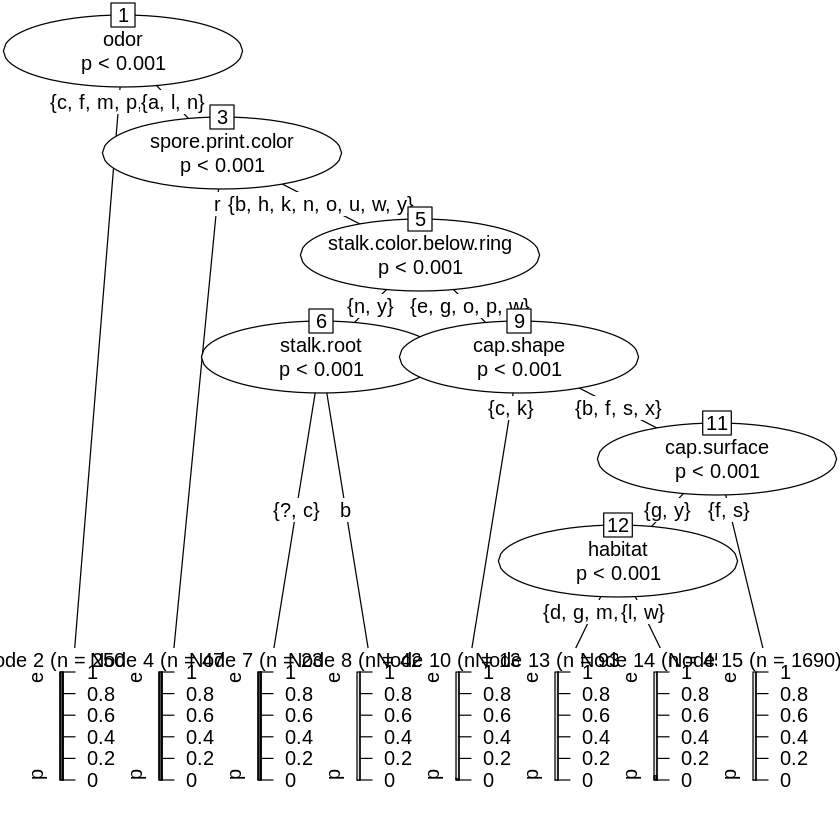

In [ ]:
plot(modelo_arvore)

Verifica-se que dos 23 atributos apenas 7 estão presentes na árvore e os demais foram podados. A poda, eliminação  de alguns nós ou níveis, é frequentemente usada para aumentar a generalidade do modelo e reduzir o sobreajuste.

In [ ]:
# matriz de confus�o
matconf = table(previsao_arvore,test$class, dnn = list("Previsto", "Real"))
print(matconf)


        Real
Previsto    e    p
       e 1373    3
       p    0 1332


In [ ]:
VP <- matconf[4]
VN <- matconf[1]
FP <- matconf[2]
FN <- matconf[3]
P <- VP + FN
N <- VN + FP

In [ ]:
glue('Verdadeiro Positivo = {VP}')
glue('Verdadeiro Negativo = {VN}')
glue('Falso Positivo =      {FP}')
glue('Falso Negativo =      {FN}')
glue('Número de eventos = {P}')
glue('Número de não eventos = {N}')

Verdadeiro Positivo = 1332

Verdadeiro Negativo = 1373

Falso Positivo =      0

Falso Negativo =      3

Número de eventos = 1335

Número de não eventos = 1373

In [ ]:
acuracia <- (VN + VP) / (P + N) 
round(acuracia,3)

[1] 0.999

In [ ]:
sensibilidade <- VP / (VP + FN)
round(sensibilidade,3)

[1] 0.998

In [ ]:
especificidade <- VN / (VN + FP)
round(especificidade,3)

[1] 1

Sobre Random Forests:

A ideia é que um grande conjunto de dados pode ser particionado, 
em geral aleatoriamente para evitar viés dos conjuntos dados, e 
podemos treinar a árvore em separado para cada conjunto. A vantagem é paralelisar o processamento tornando o mais rápido, outra vantagem é que ao obter a média de diferentes processamentos o modelo tenderá a ser mais generalizado, evitando o overfitting.